# 순수 DS만 전처리 - DS-MOVE ~ DS-YARSIDE

In [2]:
import pandas as pd
import numpy as np
import os
from tqdm import tqdm

cwd = os.getcwd()
print('현재 폴더 경로 : ', cwd)
# 폴더 위치 변경
os.chdir("C:\\Users\hyunj\\Dropbox\\종합설계프로젝트\\중요\\데이터\\")
print('변경 후 폴더 경로 : ', cwd)
print('현재 폴더 파일 : ', os.listdir())
data = pd.read_csv('Container DS perspective.csv')
print('feature 항목 : ', data.columns)
data

현재 폴더 경로 :  c:\Users\hyunj\Desktop\종합설계프로젝트
변경 후 폴더 경로 :  c:\Users\hyunj\Desktop\종합설계프로젝트
현재 폴더 파일 :  ['Block perspective.csv', 'CHE I perspective.csv', 'CHE II perspective.csv', 'Container Data.csv', 'Container DS perspective.csv', 'Container LD perspective.csv', 'Container perspective.csv', 'Data.csv', 'DS.csv', 'DStoLD.csv', 'Dwell Time', 'Gate perspective.csv', 'GI perspective.csv', 'GO perspective.csv', 'ITV perspective.csv', 'LD.csv', 'QC perspective.csv', 'Vessel perspective.csv', 'Weather.csv']
feature 항목 :  Index(['Unnamed: 0', 'VESSEL', 'CONTAINER_NO', 'MCHN_ID', 'MCHN_TP_CD',
       'FULL_EMPTY', 'JOB_TYPE', 'POD', 'BLOCK_BAY', 'JOB_START_DT',
       'JOB_END_DT'],
      dtype='object')


,Unnamed: 0,VESSEL,CONTAINER_NO,MCHN_ID,MCHN_TP_CD,FULL_EMPTY,JOB_TYPE,POD,BLOCK_BAY,JOB_START_DT,JOB_END_DT
0,1,ALAP-001/2018,AXIU1484082-2,GC112,QC,F,DS-QUAYSIDE,KRPUS,1B-38,20180131211752,20180131211924
1,2,ALAP-001/2018,AXIU1484082-2,TC221,TC,F,DS-YARDSIDE,KRPUS,1B-38,20180131213633,20180131213805
2,3,ALAP-001/2018,AXIU1484082-2,YT511,YT,F,DS-MOVE,KRPUS,1B-38,20180131211924,20180131213633
3,7,ALAP-001/2018,BGBU5060490-3,GC109,QC,F,DS-QUAYSIDE,KRPUS,3F-69,20180131205748,20180131205920
4,8,ALAP-001/2018,BGBU5060490-3,TC266,TC,F,DS-YARDSIDE,KRPUS,3F-69,20180131211132,20180131211304
...,...,...,...,...,...,...,...,...,...,...,...
223759,424301,SXNW-001/2018,UESU4153686-1,TC231,TC,F,DS-YARDSIDE,KRPUS,1C-10,20180129203032,20180129203204
223760,424302,SXNW-001/2018,UESU4153686-1,YT526,YT,F,DS-MOVE,KRPUS,1C-10,20180129201812,20180129203032
223761,424303,SXNW-001/2018,UESU4586161-1,GC110,QC,F,DS-QUAYSIDE,KRPUS,2B-74,20180129201945,20180129202117
223762,424304,SXNW-001/2018,UESU4586161-1,TC224,TC,F,DS-YARDSIDE,KRPUS,2B-74,20180129203317,20180129203449


In [3]:
#! 이거는 케이스 2에서
# Gate perspective에서 연결되지 못하는 DS만 추출

gate_data = pd.read_csv('GO perspective.csv')

gate_data.drop('Variant', axis = 1, inplace = True)
gate_data.drop('Variant index', axis = 1, inplace = True)

gate_data.rename(columns = {'Case ID':'CONTAINER_NO',
                       'Activity':'JOB_TYPE',
                       'Start Timestamp': 'JOB_START_DT',
                       'Complete Timestamp' : 'JOB_END_DT'},
                        inplace=True)

In [8]:
# DS의 컨테이너 ID
total_unique_container_list = list(data['CONTAINER_NO'].unique())
print(len(total_unique_container_list))

#! 이전에 통합한 순수 DS와 DS to LD 호출
# 다행히... 예전에 코딩해놔서 다행이네... 아닌거같은데? 이거 쓰면 더 어려울거같은데?
integrated_ds = pd.read_csv('C:/Users/hyunj/Dropbox/종합설계프로젝트/중요/데이터/Dwell Time/통합/Integrated DS.csv', encoding='CP949')
integrated_ds = integrated_ds[integrated_ds['JOB_TYPE'].str.startswith('DS')]
print(len(integrated_ds))
integrated_ds_to_ld = pd.read_csv('C:/Users/hyunj/Dropbox/종합설계프로젝트/중요/데이터/Dwell Time/통합/Integrated DStoLD.csv', encoding='CP949')
integrated_ds_to_ld = integrated_ds_to_ld[integrated_ds_to_ld['JOB_TYPE'].str.startswith('DS')]
print(len(integrated_ds_to_ld))

compare_df = pd.concat([integrated_ds, integrated_ds_to_ld])
compare_container_list = list(compare_df['CONTAINER_NO'].unique())

74550
148950


C:\Users\hyunj\AppData\Local\Temp\ipykernel_19572\3794368618.py:10: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  integrated_ds_to_ld = pd.read_csv('C:/Users/hyunj/Dropbox/종합설계프로젝트/중요/데이터/Dwell Time/통합/Integrated DStoLD.csv', encoding='CP949')


74700


In [10]:
data = compare_df[compare_df['CONTAINER_NO'].isin(total_unique_container_list)]
print(len(data['CONTAINER_NO'].unique()))

74550


In [26]:
# DS MOVING TIME 분포 확인
moving_time_list = []

for container in tqdm(total_unique_container_list, desc = "데이터 통합 중") : 
    temp_df = data[data['CONTAINER_NO'] == container].reset_index(drop=True)
    # YARDSIDE의 작업이 끝나는 시간 - MOVE가 시작하는 시간
    start_time = temp_df.loc[1, 'JOB_START_DT']
    end_time = temp_df.loc[2, "JOB_END_DT"]
    moving_time = (end_time - start_time).seconds / 60
    moving_time_list.append(moving_time)
    

데이터 통합 중: 100%|██████████| 74550/74550 [20:15<00:00, 61.35it/s]  


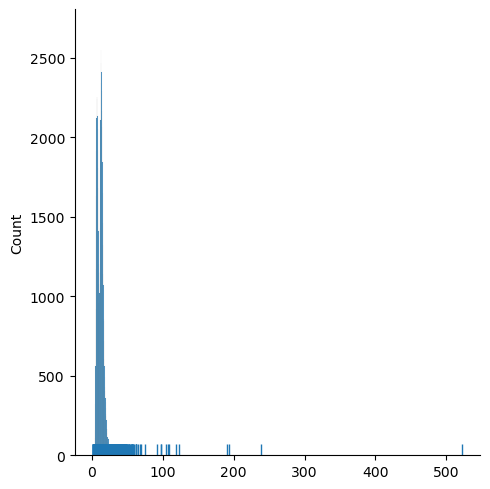

In [28]:
# 분포 확인
import matplotlib.pyplot as plt
import seaborn as sns
sns.displot(moving_time_list, rug=True)
plt.show()

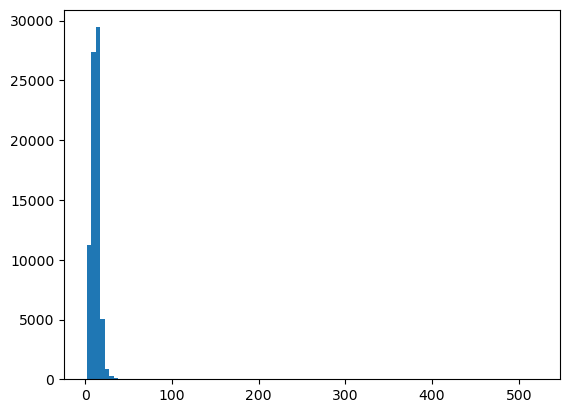

In [33]:
n, bins, patches = plt.hist(moving_time_list, bins=100)
plt.show()

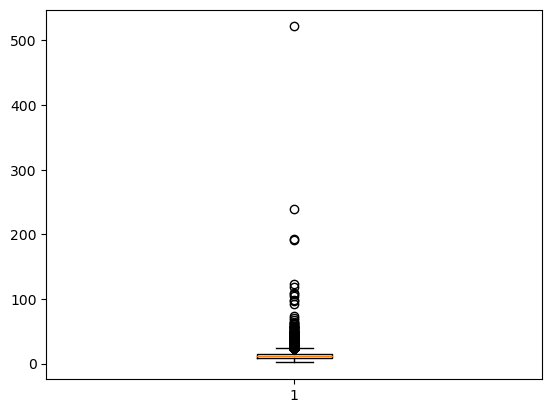

In [34]:
# 박스 플롯 - 근데 이거는 한 곳에서 나온 경우가 아니기 떄문에 박스 플롯을 통하여 이상치라고 하면 안됨
plt.boxplot(moving_time_list)
plt.show()